# Untitled Supermarked Project
Goal of the project is to gain insights on retail behaviour combining Data Science and Queuing Theory.

## Setting up Workshop

### Importing Libraries

In [245]:
# DataFrames
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
# Fancy Visualizations
import seaborn as sns
# Statistics
from scipy import stats 

## 01 : Import Data

Source: https://www.kaggle.com/agasca/retail-sales/data

In [246]:
data_raw = pd.read_csv(filepath_or_buffer = "Sales.csv")

## 02 : Clean Data
|Input|Tools & Techniques|Output|
|-|-|-|
|Raw Data|Select Features|Clean Data|
||Rename Features||
||Handle Feature Format||
||Outliers||


The dataset has no missing values.

### 02-01 : Select Features
The Dataset consists of 5 features: 'Folio', 'Hora', 'Total', 'Pago', and 'Cajero'. The first one bears no usefull information and will therefore be dropped.

In [247]:
data_cln = data_raw.drop('Folio', axis = 1)

### 02-02 : Rename Features
The 4 remaining Features will be translated for transparancy.

In [248]:
data_cln.columns = ['time','price','paid','cashier']

### 02-03 : Handle Feature Format
Turning the 'time' feature into timestamp.

In [249]:
data_cln.time = pd.to_datetime(data_cln.time, format='%Y-%m-%d %H:%M:%S')

### 02-04 : Handle Outliers
Identify and mend outliers.

In [250]:
diff = (data_cln.paid / data_cln.price)

In [251]:
data_cln[stats.zscore(diff)>3]

,time,price,paid,cashier
259,2018-05-01 12:16:24,100.4,7.503003e+12,ALE HUERTA
13511,2018-05-21 13:13:43,1039.7,7.501026e+12,JUAN MARTIN
37061,2018-06-25 14:23:50,176.6,7.210597e+11,ALE HUERTA


<i>I am using the ratio of price to paid as an indicator. Here are the ones where the Zscore ist above 3, but there are many more where the "paid" value does not make sense. However, this issue is not crucial, and therefore be dealt with at a later point of time.</i>

## 03 : Data Analysis
|Input|Tools & Techniques|Output|
|-|-|-|
|Clean Data|Single Feature Analysis|Insights|
||Multiple Feature Analysis|Assumptions|

In [252]:
plt.rcParams['figure.figsize'] = [10, 5]

### 03-01 : Single Feature Analysis

#### 03-01-01 : Time

In [253]:
print("Dataset spans from",
      data_cln.time.min(),
      "to",data_cln.time.max(),
      ". A timeperiod of",
      data_cln.time.max()-data_cln.time.min(),
      ".")

Dataset spans from 2018-05-01 07:46:22 to 2018-08-31 21:13:28 . A timeperiod of 122 days 13:27:06 .


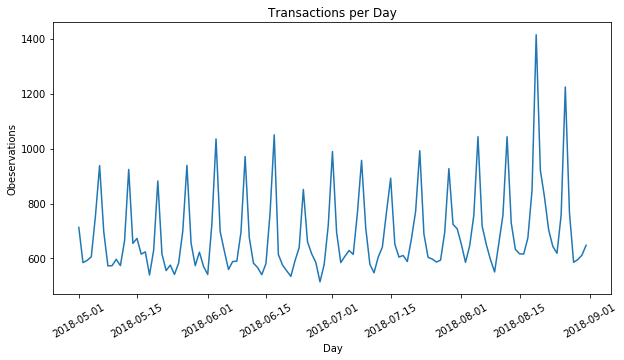

In [254]:
plt.title("Transactions per Day")
plt.plot(data_cln.resample("d", on = "time").count()["time"])
plt.ylabel("Obeservations")
plt.xlabel("Day")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- The market has between 500 and 1450 transactions every day.<br>
- There is a repeating pattern.<br>

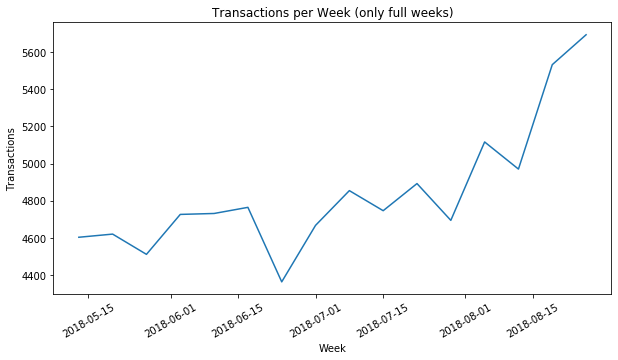

In [255]:
plt.title("Transactions per Week (only full weeks)")
plt.plot(data_cln.resample("W", on = "time").count()["time"][1:-1])
plt.ylabel("Transactions")
plt.xlabel("Week")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- The market has between 4350 and 5700 transactions every week.<br>
- It is stable around a 4600 transaction average for the first 10/11 weeks.
- But the number of transactions rises.<br>

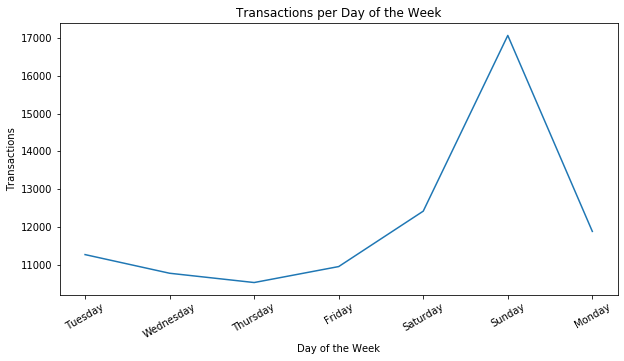

In [256]:
plt.title("Transactions per Day of the Week")
plt.plot(data_cln.groupby(data_cln.time.dt.day_name(), sort = False).time.count())
plt.ylabel("Transactions")
plt.xlabel("Day of the Week")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- All Workdays of the week have between 10000 and 12000 transactions.<br>
- All Saturdays saw a rough total of 12500, while the sum of Sunday transactions exceeds 17000.<br>
- The Minimum is in Thursday, the Maximum on Sunday.<br>
- The numbers rise and fall steadily from minimun and maximum and back<br>

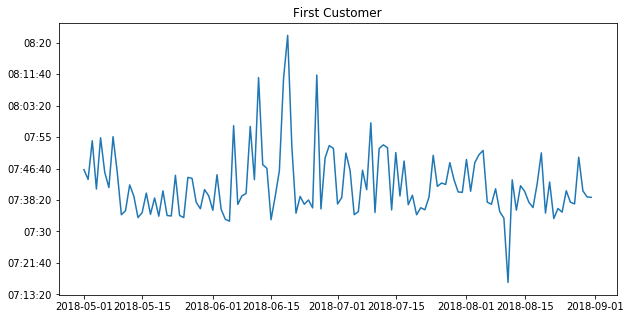

In [336]:
plt.title("First Customer")
plt.plot(data_cln.resample("D", on = "time").min()["time"].dt.time)
plt.ylabel("")
plt.show()

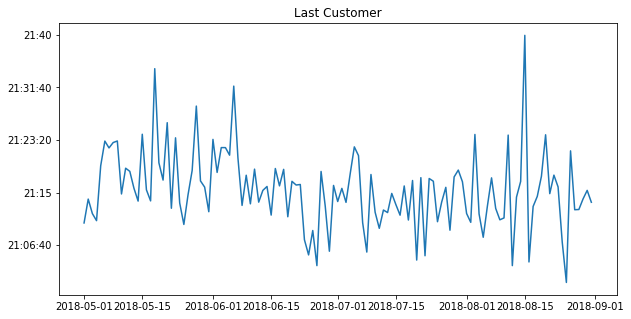

In [337]:
plt.title("Last Customer")
plt.plot(data_cln.resample("D", on = "time").max()["time"].dt.time)
plt.ylabel("")
plt.show()

<b>Assumptions:</b><br>
- The store opens at 07:30 and closes 21:30.<br>

#### 03-01-02 : Price

In [257]:
data_cln.price.describe()

count    84881.000000
mean       189.781109
std        284.032620
min      -1772.900000
25%         38.000000
50%         95.000000
75%        227.700000
max      13263.900000
Name: price, dtype: float64

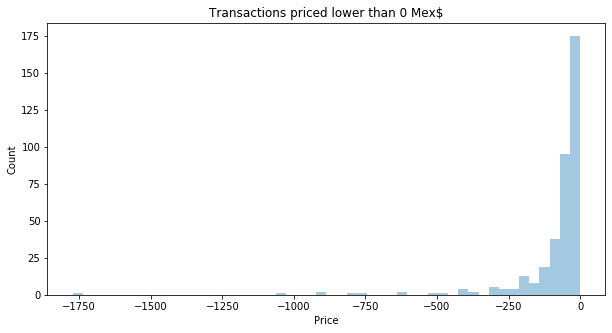

In [258]:
plt.title("Transactions priced lower than 0 Mex$")
sns.distplot(data_cln.price[data_cln.price <= 0] , kde = False)
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()

<b>Insights:</b><br>
- There are transactions with a negative ammount of Mex$.<br>

<b>Assumptions:</b><br>
- These transactions represent instances where the price of the items bought is exceeded by the worth of items handed in (f.e. bottles for recycling). These observations are therefore not faulty values.<br>

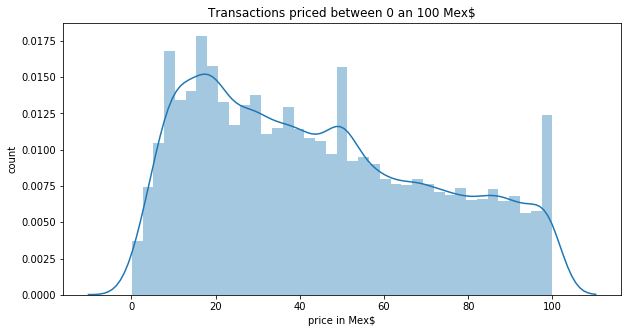

In [259]:
plt.title("Transactions priced between 0 an 100 Mex$")
sns.distplot(data_cln.price[(data_cln.price>=0)&(data_cln.price<=100)])
plt.ylabel("count")
plt.xlabel("price in Mex$")
plt.show()

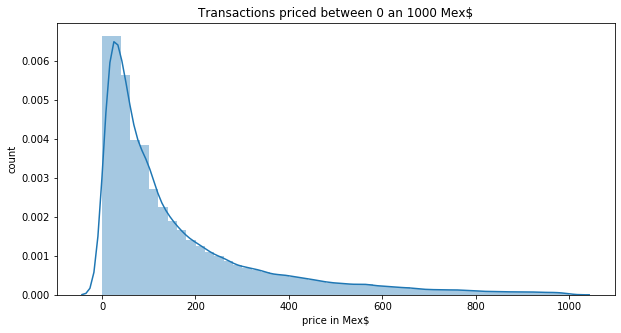

In [260]:
plt.title("Transactions priced between 0 an 1000 Mex$")
sns.distplot(data_cln.price[(data_cln.price>=0)&(data_cln.price<=1000)])
plt.ylabel("count")
plt.xlabel("price in Mex$")
plt.show()

<b>Insights:</b><br>
- The price seems to be normally distributed with the peak around 18 Mex$ and a heavy positive skew.<br>

#### 03-01-03 : Paid

<i>This Feature will be analyzed after the Outlier issues have been solved</i>

In [261]:
data_raw.Pago.describe()

count    8.488100e+04
mean     1.853214e+08
std      3.649937e+10
min      0.000000e+00
25%      5.000000e+01
50%      1.550000e+02
75%      4.000000e+02
max      7.503003e+12
Name: Pago, dtype: float64

#### 03-01-04 : Cashiers

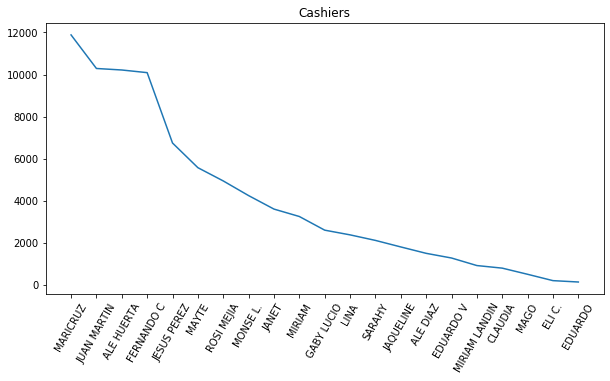

In [262]:
plt.title("Cashiers")
plt.plot(data_cln.cashier.value_counts())
plt.xticks(rotation = 60)
plt.show()

<b>Insights:</b><br>
- 21 Cashiers have been working in that supermarked in the timeperiod.<br>
- 4 of them have checked out more than 10k Transactions. The rest have all less than 7000 Transactions. <br>

### 03-02 : Multiple Feature Analysis

In [ ]:
# Correlations

In [ ]:
# Time vs Paid

In [ ]:
# Time vs Price

In [ ]:
# Time vs Cashier

In [ ]:
# Paid vs Price

In [ ]:
# Paid vs Cashier

In [ ]:
# Comment: Effects of Daylight Savingstime

In [ ]:
# Price vs Cashier

## 04-02 : Name This

In [368]:
def grab_day(day):
    return data_cln[(data_cln.time>=select)&(data_cln.time<=select+dt.timedelta(days=1))]

In [366]:
def show_day(day):
    selected = grab_day(day)
    plt.title(select.date())
    sns.scatterplot(data = selected, y = "cashier", x = "time")
    plt.xticks(rotation=60)
    plt.show()

In [380]:
def show_shiftplan(day):
    shift_plan          = pd.DataFrame([])
    shift_start         = selected.groupby("cashier").min()["time"]
    shift_end           = selected.groupby("cashier").max()["time"]
    shift_plan["start"] = shift_start
    shift_plan          = shift_plan.merge(shift_end, on = "cashier", how = "inner")
    shift_plan.rename(columns={"time": "end"}, inplace = True)
    return shift_plan.reset_index()

In [377]:
select = pd.Timestamp(dt.date(2018,5,1))

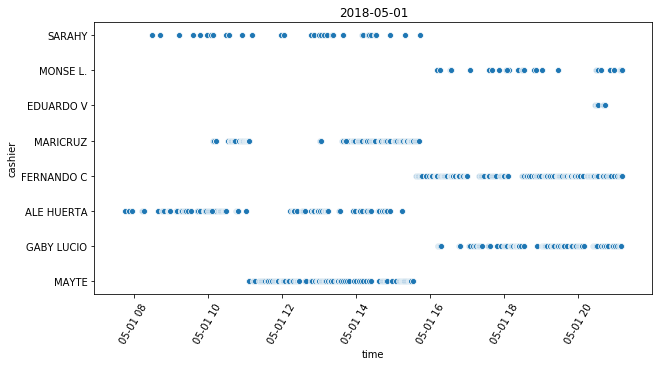

In [378]:
show_day(select)

In [381]:
show_shiftplan(select)

,cashier,start,end
0,ALE HUERTA,2018-05-01 07:46:22,2018-05-01 15:15:06
1,EDUARDO V,2018-05-01 20:27:27,2018-05-01 20:42:38
2,FERNANDO C,2018-05-01 15:37:53,2018-05-01 21:10:11
3,GABY LUCIO,2018-05-01 16:12:01,2018-05-01 21:08:32
4,MARICRUZ,2018-05-01 10:08:24,2018-05-01 15:41:22
5,MAYTE,2018-05-01 11:06:08,2018-05-01 15:32:43
6,MONSE L.,2018-05-01 16:11:16,2018-05-01 21:09:54
7,SARAHY,2018-05-01 08:30:08,2018-05-01 15:43:22


## Future Works

<b>Overall Project</b><br>
- Create common Vocabulary<br>
- Come up with Supermarket related pun as project title<br>
- Name that<br>
- Comment Code<br>

<b>Cleaning</b><br>
- Anonymize cashiers, using faker<br>
- Handle Outliers<br>

<b>Analysis</b><br>
- Add Histograms to 03-01-01 = Analyse Frequency<br>
- Create Multiplot for 03-01-02<br>
- Confirm Assumption on Opening Hours for all weekdays<br>
- "Observations per Week (only full weeks)" apply .isocalendar()[1]<br>
- Fix 03-01-01 Warning ("converter")<br>

<b>Name This</b><br>
- y Ticks Format Dayview<br>

- Reformat Data to "cashier shift" by combining groupby() and resample(), try those "\".<br>
- Consider Visualizations via Bookeh<br>
- Long and Short Jupyter Notebooks<br>
- Moresophisticated Outliear mending<br>